In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# EDA OF SAlesData 



In [ ]:
df = pd.read_excel('SaleData.xlsx')

In [3]:
df.head()

,S.No.,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,1,2019-08-07,Central,Hermann,Shelli,Video Games,42.0,58.5,2457.0
1,2,2019-08-24,West,Timothy,Stephen,Desk,3.0,125.0,375.0
2,3,2019-09-10,Central,Timothy,David,Television,7.0,1198.0,8386.0
3,4,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
4,5,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0


In [5]:
df.shape

(52, 9)

In [6]:
df.columns

Index(['S.No.', 'OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   S.No.       52 non-null     int64         
 1   OrderDate   52 non-null     datetime64[ns]
 2   Region      50 non-null     object        
 3   Manager     51 non-null     object        
 4   SalesMan    50 non-null     object        
 5   Item        50 non-null     object        
 6   Units       49 non-null     float64       
 7   Unit_price  52 non-null     float64       
 8   Sale_amt    52 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ KB


In [8]:
df.isnull().sum()

,0
S.No.,0
OrderDate,0
Region,2
Manager,1
SalesMan,2
Item,2
Units,3
Unit_price,0
Sale_amt,0


In [9]:
num_cols = df.select_dtypes(['int64','float64']).columns
for col in num_cols:
  df[col] = df[col].fillna(df[col].median())

In [10]:
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  df[col] = df[col].fillna('Unknown')

In [11]:
df.isna().sum()

,0
S.No.,0
OrderDate,0
Region,0
Manager,0
SalesMan,0
Item,0
Units,0
Unit_price,0
Sale_amt,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,S.No.,OrderDate,Units,Unit_price,Sale_amt
count,52.000000,52,52.000000,52.000000,52.000000
mean,26.500000,2019-01-23 04:09:13.846153728,49.750000,572.490385,26909.567308
min,1.000000,2018-01-06 00:00:00,2.000000,58.500000,0.000000
25%,13.750000,2018-08-10 18:00:00,27.750000,200.000000,3144.375000
50%,26.500000,2019-02-26 12:00:00,50.000000,500.000000,15636.000000
75%,39.250000,2019-07-08 06:00:00,75.250000,1198.000000,40857.500000
max,52.000000,2019-12-21 00:00:00,96.000000,1198.000000,113810.000000
std,15.154757,NaN,30.539512,450.885550,30862.306606


In [15]:
df.var(numeric_only=True)

,0
S.No.,2.296667e+02
Units,9.326618e+02
Unit_price,2.032978e+05
Sale_amt,9.524820e+08


In [16]:
df.skew(numeric_only=True)

,0
S.No.,0.000000
Units,-0.028932
Unit_price,0.452822
Sale_amt,1.430818


In [17]:
df.columns

Index(['S.No.', 'OrderDate', 'Region', 'Manager', 'SalesMan', 'Item', 'Units',
       'Unit_price', 'Sale_amt'],
      dtype='object')

In [20]:
total_sales = df['Sale_amt'].sum()

In [21]:
avg_sales = df['Sale_amt'].mean()

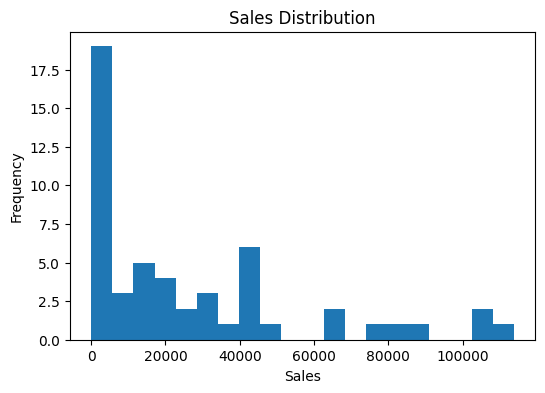

In [24]:
plt.figure(figsize=(6,4))
plt.hist(df['Sale_amt'], bins=20)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [30]:
#Revenue by region
total_rev = df.groupby('Region')['Sale_amt'].sum()

In [29]:
#Avg revenue by region
df.groupby('Region')['Sale_amt'].mean().sort_values(ascending=False)

,Sale_amt
Region,
Unknown,65175.000000
Central,29678.672414
East,22862.857143
West,12598.000000


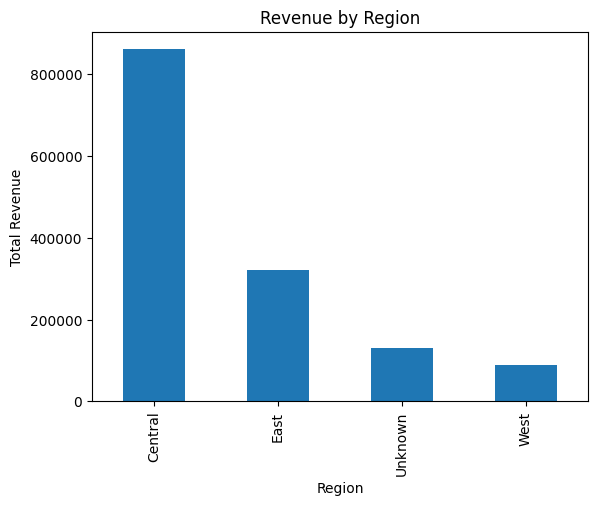

In [31]:
total_rev.plot(kind='bar', title='Revenue by Region')
plt.ylabel('Total Revenue')
plt.show()

In [32]:
#revenue by item

In [33]:
#monthly revenue

In [34]:
#salesman performance